Practical Implementation of SVR Algo on Diabetes Dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Loading the dataset from sklearn.
from sklearn.datasets import load_diabetes

In [13]:
df=load_diabetes(as_frame=True)

In [14]:
# splitting data into target and features data 
x=df.data.dropna()
y=df.target.dropna()

In [22]:
# checking is their any null values in data
print("Features data:- \n",x.isnull().sum())
print("\nTarget data :- ",y.isnull().sum())


Features data:- 
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Target data :-  0


In [24]:
# splitting data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
# now standardizing the data for better regression.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test) 

In [26]:
# now importing the model SVR
from sklearn.svm import SVR
reg=SVR()

In [27]:
# 1st model without hyperparameter tunning.
reg.fit(x_train,y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [29]:
# predicting from model1
y_pred1=reg.predict(x_test)

In [30]:
# now checking the rmse and r2 score of predicted data.
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred1)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred1)

In [31]:
print("RMSE :-",rmse)
print("\nR2 Score :-",r2)

RMSE :- 65.82354046498651

R2 Score :- 0.18221699094239519


We can see without hyperparameter tunning the Residual Error is very high.

Model 2 with hyperparamter tunning.

In [50]:
# using gridSearchCV for hyperparamter tunning
from sklearn.model_selection import GridSearchCV

param={
    "C":[0.1,1,10,100],
    "epsilon":[0.01,0.1,0.5,1],
    "gamma":["scale","auto",0.001,0.01,0.1,1],
    "kernel":["linear","rbf"]
}


In [51]:
reg2=GridSearchCV(SVR(),param,cv=5,scoring="r2",n_jobs=-1,verbose=1)

In [52]:
# fitting model on training data 
reg2.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'epsilon': [0.01, 0.1, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf']}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [53]:
# best parameters and best score for cv
print("Best Parameters :-",reg2.best_params_)
print("Best CV Score :-",reg2.best_score_)

Best Parameters :- {'C': 1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score :- 0.46273171861707246


In [54]:
# now creating the best model for our test data from trained model.
reg2_final=reg2.best_estimator_

In [55]:
# now predicting for our test data
y_pred2=reg2_final.predict(x_test)

In [56]:
# checking for residual errors
mse2=mean_squared_error(y_test,y_pred2)
rmse2=np.sqrt(mse2)
r2_2=r2_score(y_test,y_pred2)

print("RMSE :-",rmse2)
print("R2 Score :-",r2_2)

RMSE :- 54.18803213582299
R2 Score :- 0.4457797801704878


The Residual Errors has decreased after using Hyperparamter tunning.
Tuned SVR is way more accurate and captures almost 2.5× more variance than the default one.

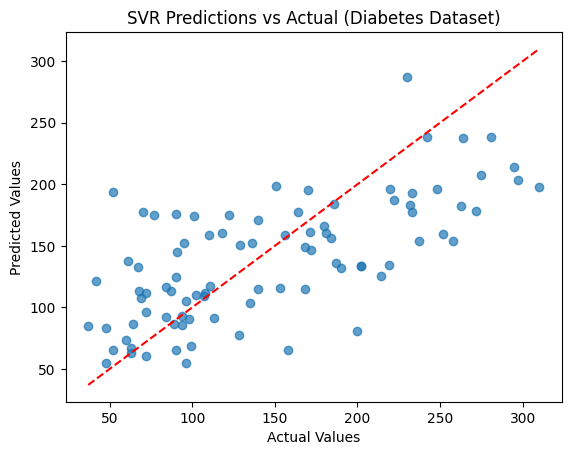

In [ ]:
# visulaization of prediction and actual values.
plt.scatter(y_test, y_pred2, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR Predictions vs Actual (Diabetes Dataset)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

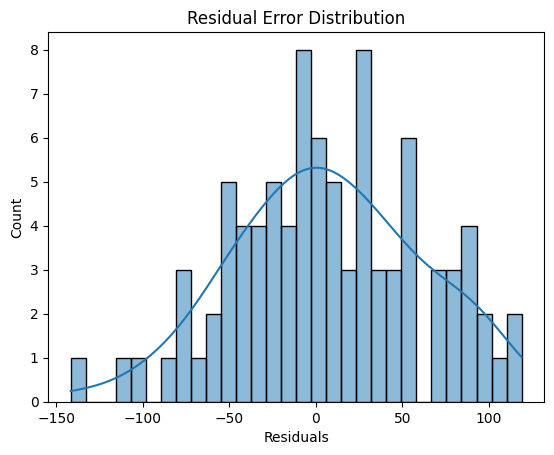

In [ ]:
# visualization for residual error.
sns.histplot(y_test-y_pred2, bins=30, kde=True)
plt.title("Residual Error Distribution")
plt.xlabel("Residuals")
plt.show()


The diabetes dataset has too much variance that's the reason of large residual errors.